In [1]:
# from https://github.com/brainiak/brainiak/blob/master/examples/eventseg/HiddenMarkovModels.ipynb

%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition

In [2]:
!wget https://ndownloader.figshare.com/files/9017983 -O sherlock.h5

/bin/sh: wget: command not found


In [3]:
# load from VGDL fMRI data

import scipy.io as sio
import numpy as np

filename = 'mat/BOLD_for_eventseg_subj1.mat'
mat = sio.loadmat(filename)

BOLD = mat['BOLD']
coords = mat['coords']
human_bounds = mat['bounds']

In [4]:
nR = BOLD.shape[0]
nTR = BOLD.shape[1]
#nSubj = BOLD.shape[2]

IndexError: tuple index out of range

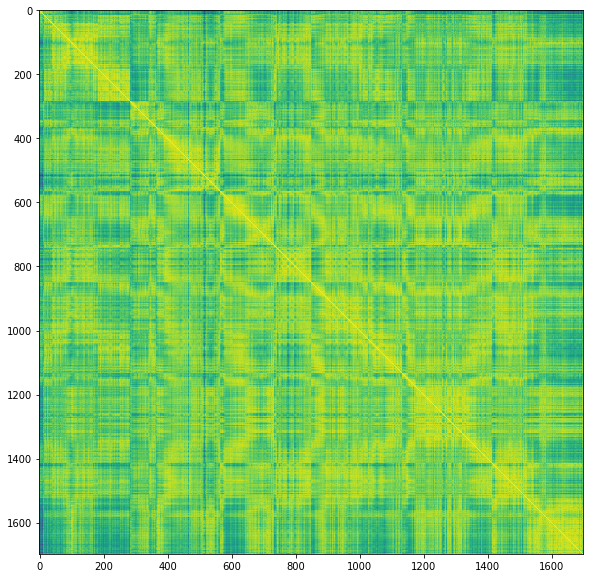

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(np.corrcoef(BOLD))

AttributeError: 'numpy.ndarray' object has no attribute 'length'

In [17]:
ev = brainiak.eventseg.event.EventSegment(170)
ev.fit(BOLD)

EventSegment(event_chains=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             n_events=170, n_iter=500, split_merge=False,
             split_merge_proposals=1,
             step_var=<function EventSegment._default_var_schedule at 0x11930fae8>)

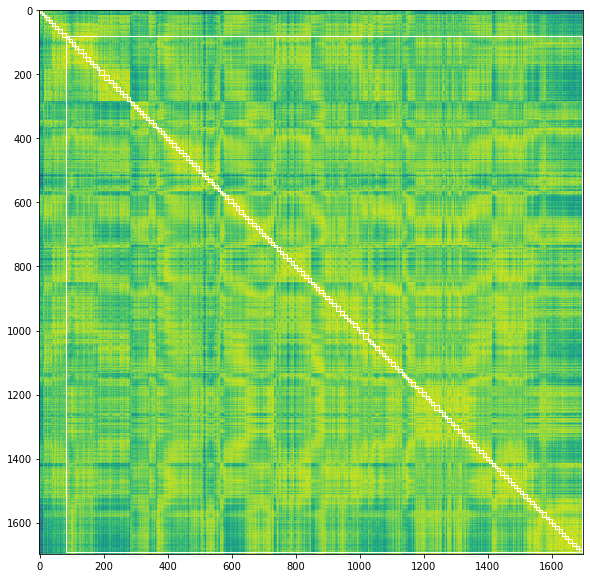

In [18]:
bounds = np.where(np.diff(np.argmax(ev.segments_[0], axis=1)))[0]
plt.figure(figsize=(10,10))
plt.imshow(np.corrcoef(BOLD))
ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=1,edgecolor='w',facecolor='none')
    ax.add_patch(rect)

In [ ]:
# Momchil note: probably won't work b/c it seems to have a bias for approximately equally sized events